### Structure Analysis

This notebook aim to study simple RDKit usage and try to generate code block for assignment of reaction center

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [10]:
glucose = Chem.MolFromSmiles('C(C1C(C(C(C(O1)O)O)O)O)O')
glucose.SetProp("_Name","glucose")
print (Chem.MolToMolBlock(glucose))

glucose
     RDKit          2D

 12 12  0  0  0  0  0  0  0  0999 V2000
    3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000   -2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500    1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  5  1  0
  5  6  1  0
  6  7  1  0
  6  8  1 

In [12]:
glucose = Chem.MolFromSmiles('C(C1C(C(C(C(O1)O)O)O)O)O')
glucose

In [3]:
from rdkit.Chem import Draw
Draw.MolToFile(glucose,'glucose.png')

![glucose](glucose.png)

https://www.rdkit.org/docs/GettingStartedInPython.html#substructure-searching

In [1]:
from IPython.display import SVG
from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

# Create mol object from smiles string
def draw_mol(mol):
    #mol = Chem.MolFromSmiles('C(C1C(C(C(C(O1)O)O)O)O)O')
    molSize=(450,150)
    mc = Chem.Mol(mol.ToBinary())

    if not mc.GetNumConformers():
        #Compute 2D coordinates
        rdDepictor.Compute2DCoords(mc)
        # init the drawer with the size
        drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
        #draw the molcule
        drawer.DrawMolecule(mc)
        drawer.FinishDrawing()
        # get the SVG string
        svg = drawer.GetDrawingText()
        # fix the svg string and display it
        display(SVG(svg.replace('Glucose','Glucose')))
    return

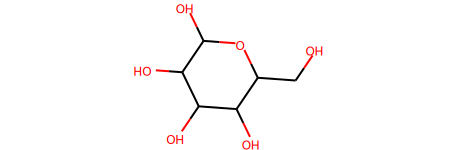

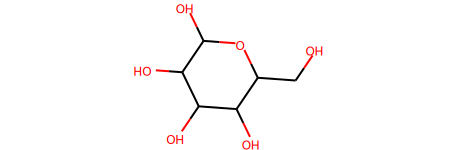

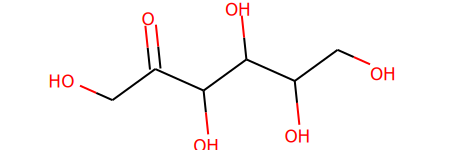

In [11]:
glucose = Chem.MolFromSmiles('C([C@@H]1[C@H]([C@@H]([C@H](C(O1)O)O)O)O)O')
galactose = Chem.MolFromSmiles('C([C@@H]1[C@@H]([C@@H]([C@H]([C@H](O1)O)O)O)O)O')
fructose = Chem.MolFromSmiles('C([C@H]([C@H]([C@@H](C(=O)CO)O)O)O)O')
draw_mol(glucose)
draw_mol(galactose)
draw_mol(fructose)

In [19]:
galactose.GetNumAtoms()

12

In [100]:
from rdkit import Chem
from rdkit.Chem import AllChem

def count_C(mol):
    return sum(1 for atom in mol.GetAtoms() if atom.GetAtomicNum() == 6)
def count_O(mol):
    return sum(1 for atom in mol.GetAtoms() if atom.GetAtomicNum() == 8)
def count_N(mol):
    return sum(1 for atom in mol.GetAtoms() if atom.GetAtomicNum() == 7)
def count_P(mol):
    return sum(1 for atom in mol.GetAtoms() if atom.GetAtomicNum() == 15)
def count_S(mol):
    return sum(1 for atom in mol.GetAtoms() if atom.GetAtomicNum() == 16)
def count_X(mol):
    return sum(1 for atom in mol.GetAtoms() if atom.GetAtomicNum() == 9 or atom.GetAtomicNum() == 17 or atom.GetAtomicNum() == 35 or atom.GetAtomicNum() == 53)
def count_H(mol):
    H = 0
    for i in range(mol.GetNumAtoms()):
        H += mol.GetAtomWithIdx(i).GetTotalNumHs(includeNeighbors=True)
    return H

def DoU(mol):
    C = count_C(mol)
    H = count_H(mol)
    O = count_O(mol)
    N = count_N(mol)
    P = count_P(mol)
    S = count_S(mol)
    X = count_X(mol)
    return int((2*C+2+N+P-X-H)/2)

from rdkit.Chem.Descriptors import MolWt

def cpd_inform(SMILES):
    
    """A function for getting compound information from SMILES string
    it received a SMILES string and return a dictionary of information consisted of number of C, H, O , N, P, S, X, Degree of Unsaturation and Molecular Weight"""
    info = {}
    mol = Chem.MolFromSmiles(SMILES)
    info['n_C'] = count_C(mol)
    info['n_H'] = count_H(mol)
    info['n_O'] = count_O(mol)
    info['n_N'] = count_N(mol)
    info['n_P'] = count_P(mol)
    info['n_S'] = count_S(mol)
    info['n_X'] = count_X(mol)
    info['DoU'] = DoU(mol)
    info['MW'] = MolWt(mol)
    
    return info

In [101]:
from rdkit import Chem
from rdkit.Chem import AllChem
from cpd_inform import cpd_inform
def test_cpd_inform():
    rapamycin = 'C[C@@H]1CC[C@H]2C[C@@H](/C(=C/C=C/C=C/[C@H](C[C@H](C(=O)[C@@H]([C@@H](/C(=C/[C@H](C(=O)C[C@H](OC(=O)[C@@H]3CCCCN3C(=O)C(=O)[C@@]1(O2)O)[C@H](C)C[C@@H]4CC[C@H]([C@@H](C4)OC)O)C)/C)O)OC)C)C)/C)OC'
    test = cpd_inform(rapamycin)
    
    assert test['n_C'] == 51, "Carbon count is incorrect"
    assert test['n_H'] == 79, "Hydrogen count is incorrect"
    assert type(test['DoU']) == type(5), "TypeError: Degree of Saturation should be an int"
    assert type(test['MW']) == type(1.0), "TypeError: Molecular Weight should be float"
    
    return 'Test pass, yayyyyyy'

In [102]:
test_cpd_inform()

'Test pass, yayyyyyy'

In [92]:
    rapamycin = 'C[C@@H]1CC[C@H]2C[C@@H](/C(=C/C=C/C=C/[C@H](C[C@H](C(=O)[C@@H]([C@@H](/C(=C/[C@H](C(=O)C[C@H](OC(=O)[C@@H]3CCCCN3C(=O)C(=O)[C@@]1(O2)O)[C@H](C)C[C@@H]4CC[C@H]([C@@H](C4)OC)O)C)/C)O)OC)C)C)/C)OC'
cpd_inform(rapamycin)

{'n_C': 51,
 'n_H': 79,
 'n_O': 13,
 'n_N': 1,
 'n_P': 0,
 'n_S': 0,
 'n_X': 0,
 'DoU': 13,
 'MW': 914.1870000000001}

In [81]:
import pandas as pd
df_master = pd.DataFrame(['C([C@@H]1[C@H]([C@@H]([C@H](C(O1)O)O)O)O)O',
         'C([C@@H]1[C@@H]([C@@H]([C@H]([C@H](O1)O)O)O)O)O',
         'C([C@H]([C@H]([C@@H](C(=O)CO)O)O)O)O', 
         'C[C@@H]1CC[C@H]2C[C@@H](/C(=C/C=C/C=C/[C@H](C[C@H](C(=O)[C@@H]([C@@H](/C(=C/[C@H](C(=O)C[C@H](OC(=O)[C@@H]3CCCCN3C(=O)C(=O)[C@@]1(O2)O)[C@H](C)C[C@@H]4CC[C@H]([C@@H](C4)OC)O)C)/C)O)OC)C)C)/C)OC'] , columns=['SMILES'])
df_master

,SMILES
0,C([C@@H]1[C@H]([C@@H]([C@H](C(O1)O)O)O)O)O
1,C([C@@H]1[C@@H]([C@@H]([C@H]([C@H](O1)O)O)O)O)O
2,C([C@H]([C@H]([C@@H](C(=O)CO)O)O)O)O
3,C[C@@H]1CC[C@H]2C[C@@H](/C(=C/C=C/C=C/[C@H](C[...


In [88]:
inf = cpd_inform('CCO')
inf

{'n_C': 2,
 'n_H': 6,
 'n_O': 1,
 'n_N': 0,
 'n_P': 0,
 'n_S': 0,
 'DoU': 0,
 'MW': 46.069}

In [83]:
# _info = pd.DataFrame(np.empty(2,2), columns=['n_C', 'n_H'])
# make it into a function that return dictionary with n_C and others as keys      

l_C = []
l_H = []
l_O = []
l_N = []
l_P = []
l_S = [] 
l_X = []
l_DoU = []
l_MW = []

for index in range(df_master.shape[0]):
    mol = Chem.MolFromSmiles(df_master['SMILES'][index])
    l_C.append(count_C(mol))
    l_H.append(count_H(mol))
    l_O.append(count_O(mol))
    l_N.append(count_N(mol))
    l_P.append(count_P(mol))
    l_S.append(count_S(mol))
    l_X.append(count_X(mol))
    l_DoU.append(DoU(mol))
    l_MW.append(MolWt(mol))

In [73]:
df_info = pd.DataFrame()
df_info['n_C'] = l_C
df_info['n_H'] = l_H
df_info['n_O'] = l_O
df_info['n_N'] = l_N
df_info['n_P'] = l_P
df_info['n_S'] = l_S
df_info['n_X'] = l_X
df_info['n_DoU'] = l_DoU
df_info['MW'] = l_MW

df_info

,n_C,n_H,n_O,n_N,n_P,n_S,n_X,n_DoU,MW
0,6,12,6,0,0,0,0,1.0,180.156
1,6,12,6,0,0,0,0,1.0,180.156
2,6,12,6,0,0,0,0,1.0,180.156
3,51,79,13,1,0,0,0,13.0,914.187


In [74]:
df_master

,SMILES
0,C([C@@H]1[C@H]([C@@H]([C@H](C(O1)O)O)O)O)O
1,C([C@@H]1[C@@H]([C@@H]([C@H]([C@H](O1)O)O)O)O)O
2,C([C@H]([C@H]([C@@H](C(=O)CO)O)O)O)O
3,C[C@@H]1CC[C@H]2C[C@@H](/C(=C/C=C/C=C/[C@H](C[...


In [80]:
df_result = pd.concat([df_master, df_info], axis=1)
df_result

,SMILES,n_C,n_H,n_O,n_N,n_P,n_S,n_X,n_DoU,MW
0,C([C@@H]1[C@H]([C@@H]([C@H](C(O1)O)O)O)O)O,6,12,6,0,0,0,0,1.0,180.156
1,C([C@@H]1[C@@H]([C@@H]([C@H]([C@H](O1)O)O)O)O)O,6,12,6,0,0,0,0,1.0,180.156
2,C([C@H]([C@H]([C@@H](C(=O)CO)O)O)O)O,6,12,6,0,0,0,0,1.0,180.156
3,C[C@@H]1CC[C@H]2C[C@@H](/C(=C/C=C/C=C/[C@H](C[...,51,79,13,1,0,0,0,13.0,914.187


In [9]:
galactose = Chem.MolFromSmiles('C([C@@H]1[C@@H]([C@@H]([C@H]([C@H](O1)O)O)O)O)O')

In [10]:
rapamycin = Chem.MolFromSmiles('C[C@@H]1CC[C@H]2C[C@@H](/C(=C/C=C/C=C/[C@H](C[C@H](C(=O)[C@@H]([C@@H](/C(=C/[C@H](C(=O)C[C@H](OC(=O)[C@@H]3CCCCN3C(=O)C(=O)[C@@]1(O2)O)[C@H](C)C[C@@H]4CC[C@H]([C@@H](C4)OC)O)C)/C)O)OC)C)C)/C)OC')

print ('Number of Carbon is ', count_C(rapamycin))
print ('Number of Hydrogen is ', count_H(rapamycin))
print ('Number of Oxygen is ', count_O(rapamycin))
print ('Number of Nitrogen is ', count_N(rapamycin))
print ('Number of Sulfur is ', count_S(rapamycin))
print ('Number of Halogen is ', count_X(rapamycin))
print ('The Degree of Unsaturation (DoU) is ', DoU(rapamycin))
print ('Molecular Weight is', MolWt(rapamycin))

Number of Carbon is  51
Number of Hydrogen is  79
Number of Oxygen is  13
Number of Nitrogen is  1
Number of Sulfur is  0
Number of Halogen is  0
The Degree of Unsaturation (DoU) is  13.0
Molecular Weight is 914.1870000000001


In [34]:
for i in range(galactose.GetNumAtoms()):
    print('n(H) at C', i+1, 'is ',galactose.GetAtomWithIdx(i).GetTotalNumHs(includeNeighbors=True))

n(H) at C 1 is  2
n(H) at C 2 is  1
n(H) at C 3 is  1
n(H) at C 4 is  1
n(H) at C 5 is  1
n(H) at C 6 is  1
n(H) at C 7 is  0
n(H) at C 8 is  1
n(H) at C 9 is  1
n(H) at C 10 is  1
n(H) at C 11 is  1
n(H) at C 12 is  1


In [29]:
galactose.GetTotalNumHs(includeNeighbors=True)

AttributeError: 'Mol' object has no attribute 'GetTotalNumHs'

In [27]:
from rdkit.Chem.Descriptors import MolWt

In [28]:
MolWt(galactose)

180.156

In [13]:
from IPython.display import SVG
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import rdMolDraw2D
# load the reaction from the rxn file
rxn = Chem.ReactionFromRxnFile('Reaction.rxn')
molSize=(800,300)
# Init the drawer with the size
drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
#draw the reaction
drawer.DrawReaction(rxn, False, None, None)
drawer.FinishDrawing()
# get the SVG string
svg = drawer.GetDrawingText()
# fix the svg string and display it
display(SVG(svg.replace('svg:','')))

ArgumentError: Python argument types in
    MolDraw2D.DrawReaction(MolDraw2DSVG, NoneType, bool, NoneType, NoneType)
did not match C++ signature:
    DrawReaction(class RDKit::MolDraw2D {lvalue} self, class RDKit::ChemicalReaction rxn, bool highlightByReactant=False, class boost::python::api::object highlightColorsReactants=None, class boost::python::api::object confIds=None)

In [6]:
from rdkit.Chem.Draw import ReactionToImage

In [7]:
rxn = Chem.MolFromSmiles('CC(=O)O.OCC>[H+].[Cl-].OCC>CC(=O)OCC')
ReactionToImage(rxn)

AttributeError: 'NoneType' object has no attribute 'GetNumReactantTemplates'

In [ ]:
rxn = 
draw_rxn = rdkit.Chem.Draw.ReactionToImage(rxn, subImgSize=(200, 200), useSVG=False, **kwargs)
